In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import csv
import os
import warnings
warnings.filterwarnings("ignore")

In [40]:
cwd = os.getcwd()

In [3]:
start_date = [
    "2022-07-27", "2022-06-15", "2022-05-04", "2022-03-16", 
    "2018-12-19", "2018-09-26", "2018-06-13", "2018-03-21",
    "2017-12-13", "2017-06-14", "2017-03-15", "2016-12-14", "2015-12-16", "2006-06-29", "2006-05-10",
    "2006-03-28", "2006-01-31", "2005-12-13","2005-11-01", "2005-09-01","2005-09-20","2005-08-09","2005-06-30",
    "2005-05-03", "2005-03-22", "2005-02-02","2004-12-14","2004-11-10","2004-09-21","2004-08-10","2004-06-30",
    "2000-05-16","2000-03-21", "2000-02-02"
    ]
end_date = []

for i in range(len(start_date)): ## Generate End dates for each FOMC meeting term
    start_date[i] = datetime.strptime(start_date[i], "%Y-%m-%d") - timedelta(days = 1)
    end_date.append(start_date[i] + timedelta(days = 55))
    start_date[i] = datetime.strftime(start_date[i], "%Y-%m-%d") 
    end_date[i] = datetime.strftime(end_date[i], "%Y-%m-%d") # end_date and start_date as strings


In [4]:
def initTicker(stock):
    ticker = stock
    dir = cwd + "\\Data\\TransformedData\\{}.csv".format(ticker)
    df = pd.read_csv(dir)
    termInfo = pd.read_csv("TermInformation.csv")
    termInfo = termInfo.set_index('Unnamed: 0')
    termInfo.index.name = "Ticker"
    df.index.name = "Date"
    return df, termInfo

In [5]:
def getRecDays(termInfo, ticker):
    recDay1 = termInfo.loc[ticker][0]
    recDay2 = termInfo.loc[ticker][1]
    term = termInfo.loc[ticker][2]
    return recDay1, recDay2, term

In [6]:
def backtest(df, recDay1, recDay2, term):
    init = 1
    win = 0
    lose = 0
    for i in range(len(df)):
        vect = df.loc[len(df) - i - 1]
        vect = vect.drop('id')
        recDay1 = np.floor(recDay1).astype(int)
        recDay2 = np.floor(recDay2).astype(int)
        term = np.round(term).astype(int)
        buyPrice = 0.0
        sellPrice = 0.0
        if vect[recDay1] < vect[0]:
            buyPrice = vect[recDay1]
        else:
            print("{}th FOMC Return : 1.00".format(i))
            print("Cumulative Return : {}".format(init))
            continue
        for day in range(recDay1, min(recDay1 + term + 1, 31)):
            if vect[day] < 0.95 * buyPrice:
                sellPrice = vect[day]
                init = init * sellPrice / buyPrice
                lose = lose + 1
                break
        if sellPrice != 0:
            print("{}th FOMC : Buy {} Sell {} Return {}".format(i, buyPrice, sellPrice, sellPrice / buyPrice))
            print("Cumulative Return : {}".format(init))
            continue
        sellPrice = vect[recDay1 + term]
        init = init * sellPrice / buyPrice
        print("{}th FOMC : Buy {} Sell {} Return {}".format(i, buyPrice, sellPrice, sellPrice / buyPrice))
        print("Cumulative Return : {}".format(init))
        if(sellPrice > buyPrice):
            win = win + 1
    print(win, lose)
    return init, win, lose

def backtestSup(df, recDay1, recDay2, term):
    init = 1
    win = 0
    lose = 0
    for i in range(len(df)):
        vect = df.loc[len(df) - i - 1]
        vect = vect.drop('id')
        recDay1 = np.floor(recDay1).astype(int)
        recDay2 = np.floor(recDay2).astype(int)
        term = np.round(term).astype(int)
        buyPrice = 0.0
        sellPrice = 0.0
        if vect[recDay1] < vect[0]:
            buyPrice = vect[recDay1]
        else:
            continue
        for day in range(recDay1, min(recDay1 + term + 1, 31)):
            if vect[day] < 0.95 * buyPrice:
                sellPrice = vect[day]
                init = init * sellPrice / buyPrice
                lose = lose + 1
                break
        if sellPrice != 0:
            continue
        sellPrice = vect[recDay1 + term]
        init = init * sellPrice / buyPrice
        if(sellPrice > buyPrice):
            win = win + 1
    return init, win, lose

def backtestFuture(df, recDay1, recDay2, term):
    init = 1
    win = 0
    lose = 0
    for i in range(31, len(df)):
        vect = df.loc[len(df) - i - 1]
        vect = vect.drop('id')
        recDay1 = np.floor(recDay1).astype(int)
        recDay2 = np.floor(recDay2).astype(int)
        term = np.round(term).astype(int)
        buyPrice = 0.0
        sellPrice = 0.0
        if vect[recDay1] < vect[0]:
            buyPrice = vect[recDay1]
        else:
            continue
        for day in range(recDay1, min(recDay1 + term + 1, 31)):
            if vect[day] < 0.95 * buyPrice:
                sellPrice = vect[day]
                init = init * sellPrice / buyPrice
                lose = lose + 1
                break
        if sellPrice != 0:
            continue
        sellPrice = vect[recDay1 + term]
        init = init * sellPrice / buyPrice
        if(sellPrice > buyPrice):
            win = win + 1
    return init, win, lose

In [7]:
def pipeline(stock):
    df, termInfo = initTicker(stock)
    recDay1, recDay2, term = getRecDays(termInfo, stock)
    return backtest(df, recDay1, recDay2, term)

In [8]:
cluster2 = ['ABBV', 'AXP', 'BALL', 'BDX', 'BSX', 'CARR', 'CDAY', 'CF', 'CTLT',
       'DAL', 'DOW', 'FTV', 'GM', 'HCA', 'HLT', 'HPE', 'HWM', 'JCI', 'LDOS',
       'LNC', 'LYB', 'MA', 'MGM', 'OTIS', 'SYF', 'TDG', 'TEL', 'TFX', 'TMO',
       'TPR', 'URI', 'WM', 'WRK', 'XYL', 'ZTS']
cluster1 = ['AAP', 'ABC', 'ACN', 'ADM', 'ALL', 'APTV', 'BA', 'BBY', 'CAH', 'CBRE',
       'CHD', 'CMA', 'CMI', 'COF', 'COP', 'CRM', 'CTVA', 'CVS', 'DG', 'DGX',
       'DVA', 'EQR', 'ETN', 'EW', 'EXR', 'FDX', 'FLT', 'GLW', 'GNRC', 'GS',
       'HAL', 'HIG', 'HPQ', 'IR', 'KEY', 'KEYS', 'KMX', 'KR', 'LIN', 'LVS',
       'LYV', 'MLM', 'MPC', 'MRO', 'MSCI', 'MSI', 'NUE', 'OGN', 'PM', 'PPG',
       'PRU', 'PSX', 'PXD', 'ROK', 'SCHW', 'SHW', 'SJM', 'SPG', 'TDY', 'TWTR',
       'TYL', 'UDR', 'UPS', 'VFC', 'VICI', 'VLO', 'VNO', 'WFC']

In [55]:
def initTickerCluster(stock, retroactive):
    ticker = stock
    retro = ""
    if retroactive:
        retro = "Retroactive"
    dir = cwd + "\\Data\\TransformedData\\{}.csv".format(ticker)
    df = pd.read_csv(dir)
    termInfo = pd.read_csv("TermInformation{}.csv".format(retro))
    termInfo = termInfo.set_index('Unnamed: 0')
    termInfo.index.name = "Ticker"
    df.index.name = "Date"
    return df, termInfo

def getRecDaysCluster(cluster, retroactive):
    retro = ""
    if retroactive:
        retro = "Retroactive"
    termInfo = pd.read_csv("TermInformation{}.csv".format(retro))
    termInfo = termInfo.set_index('Unnamed: 0')
    termInfo.index.name = "Ticker"
    vect = termInfo.loc[cluster].median(axis = 0)
    recDay1 = vect[0]
    recDay2 = vect[1]
    term = vect[2]
    return recDay1, recDay2, term

def pipelineCluster(cluster):
    score = 0
    recDay1, recDay2, term = getRecDaysCluster(cluster, True)
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTickerCluster(stock, True)
        val, partWin, partLoss = backtestSup(df, recDay1, recDay2, term)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    print("Partial Wins : {} Partial Loss : {}".format(totWin, totLoss))
    return score / len(cluster)

def pipelineIndividual(cluster):
    score = 0
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTicker(stock)
        recDay1, recDay2, term = getRecDays(termInfo, stock)
        val, partWin, partLoss = backtestSup(df, recDay1, recDay2, term)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    print("Partial Wins : {} Partial Loss : {}".format(totWin, totLoss))
    return score / len(cluster)

Retroactive simulation.

In [13]:
print("Total return on Cluster-heavy strategy : {}".format(pipelineCluster(cluster1)))
print("Total return on naive strategy : {}".format(pipelineIndividual(cluster1)))

Wins : 45 Loss : 23
Partial Wins : 449 Partial Loss : 268
Total return on Cluster-heavy strategy : 1.1259868446515509
Wins : 44 Loss : 24
Partial Wins : 467 Partial Loss : 263
Total return on naive strategy : 1.147657393514228


In [16]:
print("Total return on Cluster-heavy strategy : {}".format(pipelineCluster(cluster2)))
print("Total return on naive strategy : {}".format(pipelineIndividual(cluster2)))

Wins : 28 Loss : 7
Partial Wins : 191 Partial Loss : 89
Total return on Cluster-heavy strategy : 1.1414357483514028
Wins : 23 Loss : 12
Partial Wins : 188 Partial Loss : 95
Total return on naive strategy : 1.1131793982209155


Train - Test Simulation.

In [91]:
def pipelineClusterFuture(cluster, fomc):
    score = 0
    recDay1, recDay2, term = getRecDaysCluster(cluster, False)
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTickerCluster(stock, False)
        val, partWin, partLoss = backtestFuture(df, recDay1, recDay2, term, fomc)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    return score / len(cluster), win, loss

def pipelineIndividualFuture(cluster, fomc):
    score = 0
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTicker(stock)
        recDay1, recDay2, term = getRecDays(termInfo, stock)
        val, partWin, partLoss = backtestFuture(df, recDay1, recDay2, term, fomc)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    return score / len(cluster), win, loss

In [54]:
import DataCluster

In [81]:
def backtestFuture(df, recDay1, recDay2, term, fomc):
    init = 1
    win = 0
    lose = 0
    i = fomc
    if len(df) <= 34 - i:
        return init, win, lose
    vect = df.loc[34 - i - 1]
    vect = vect.drop('id')
    recDay1 = np.floor(recDay1).astype(int)
    recDay2 = np.floor(recDay2).astype(int)
    term = np.round(term).astype(int)
    buyPrice = 0.0
    sellPrice = 0.0
    if vect[recDay1] < vect[0]:
        buyPrice = vect[recDay1]
    else:
        return init, win, lose
    for day in range(recDay1, min(recDay1 + term + 1, 31)):
        if vect[day] < 0.5 * buyPrice:
            sellPrice = vect[day]
            init = init * sellPrice / buyPrice
            lose = lose + 1
            break
    if sellPrice != 0:
        return init, win, lose
    sellPrice = vect[recDay1 + term]
    init = init * sellPrice / buyPrice
    if(sellPrice > buyPrice):
        win = win + 1
    return init, win, lose

[0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0]
              0          1
A      6.526316  20.285714
AAP   12.157895  21.857143
ABBV  12.394737  23.571429
ABC    9.789474  20.714286
ABT   11.894737  15.571429
...         ...        ...
XOM    9.842105  22.142857
XYL   10.236842  24.142857
YUM   11.684211  16.428571
ZBH   13.842105  23.285714
ZTS   12.710526  22.857143

[353 rows x 2 columns]
No third clustrer
Index(['AAP', 'ABC', 'ADM', 'ALL', 'APD', 'APTV', 'BAC', 'BAX', 'BMY', 'CBRE',
       'CMI', 'COO', 'COP', 'CTLT', 'CTVA', 'CVX', 'DAL', 'DGX', 'DVA', 'FLT',
       'GLW', 'GS', 'GWW', 'HAL', 'HPQ', 'IR', 'IRM', 'JPM', 'KEYS', 'KO',
       'LVS', 'MLM', 'MPC', 'MSCI', 'MSI', 'MTD', 'NEM', 'PPG', 'ROK', 'RTX',
       'SPGI', 'TDY', 'TFX', 'TPR', 'TWTR', 'VFC', 'VNO', 'WFC'],
      dtype='object')
Index([], dtype='object')
[-1  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1

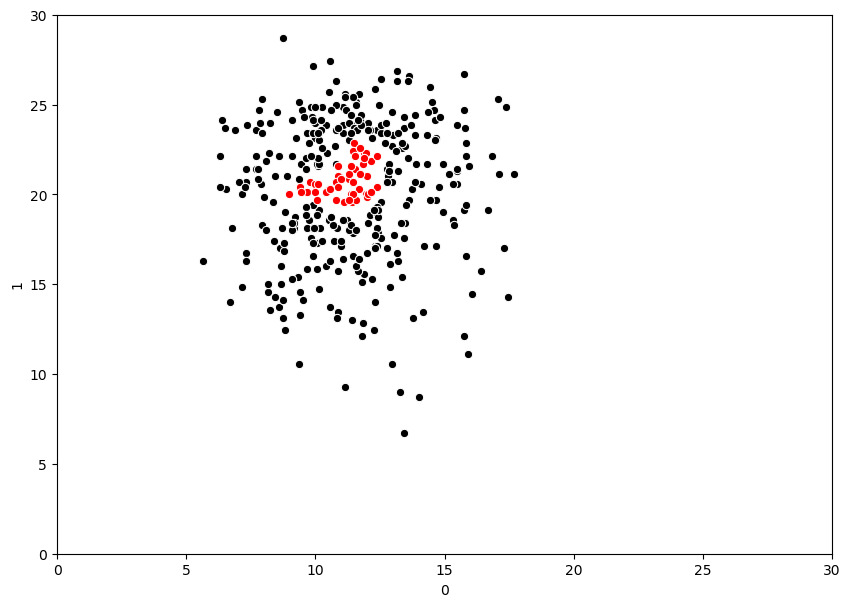

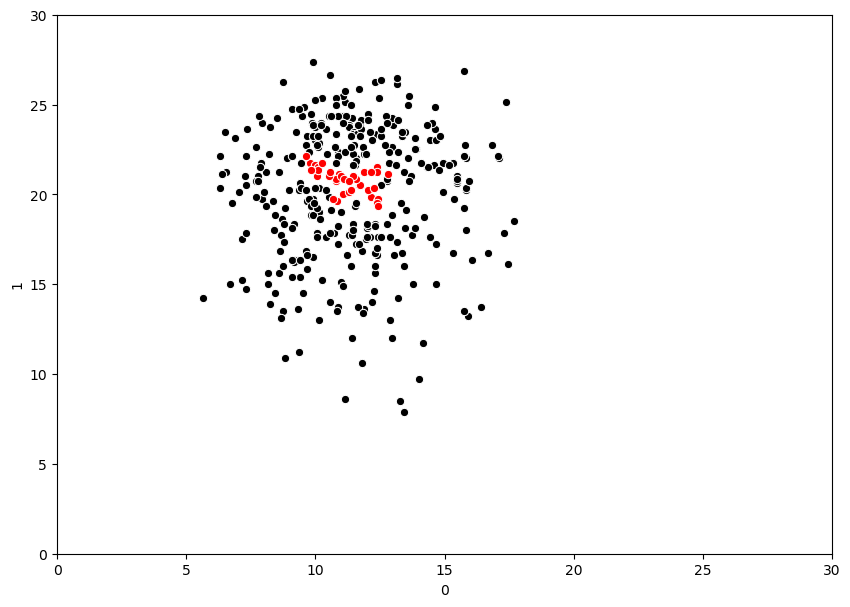

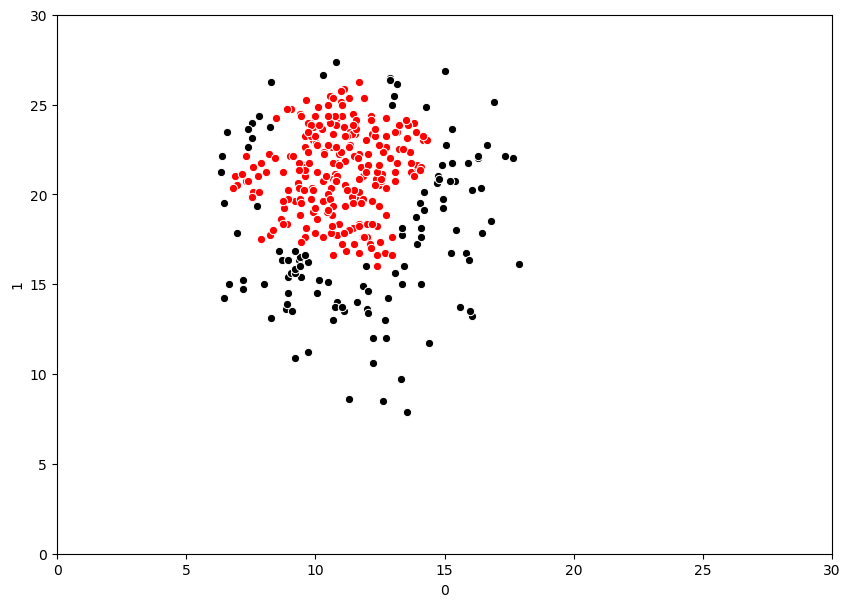

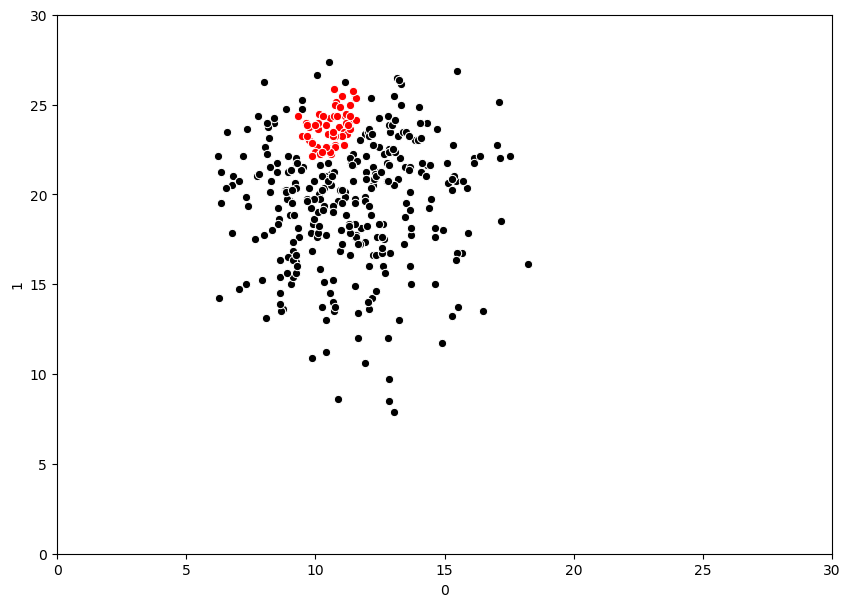

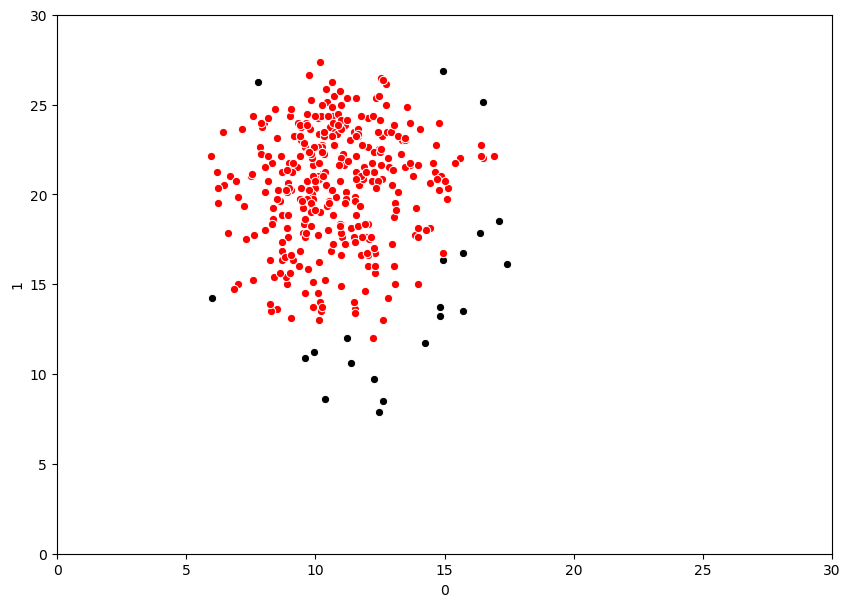

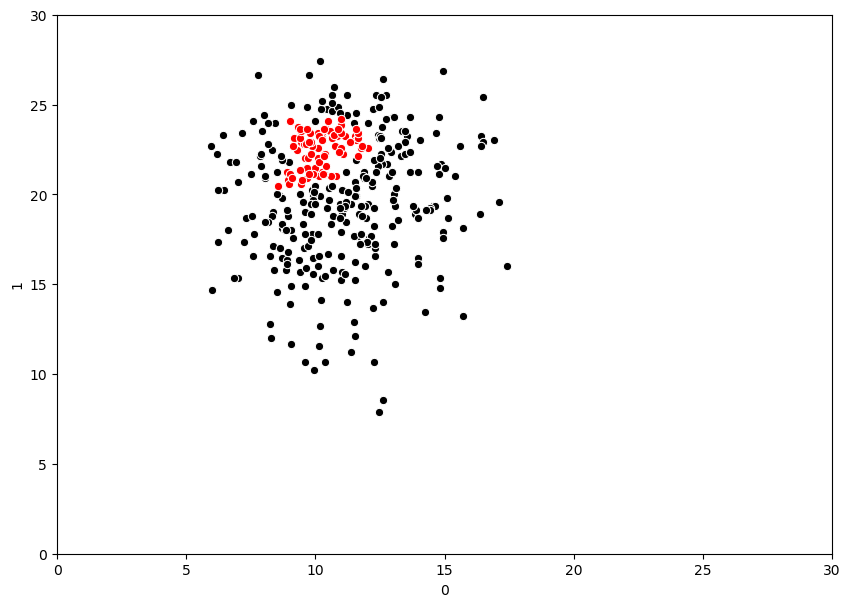

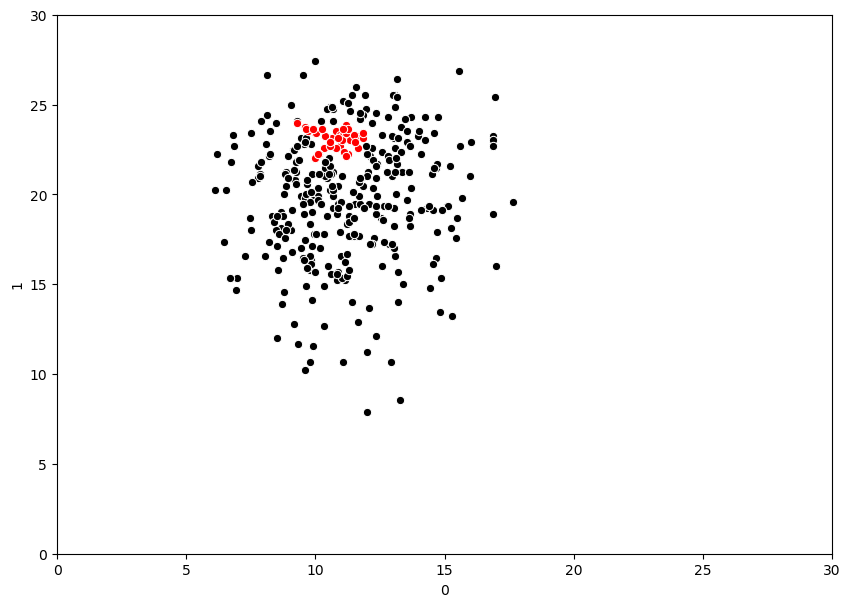

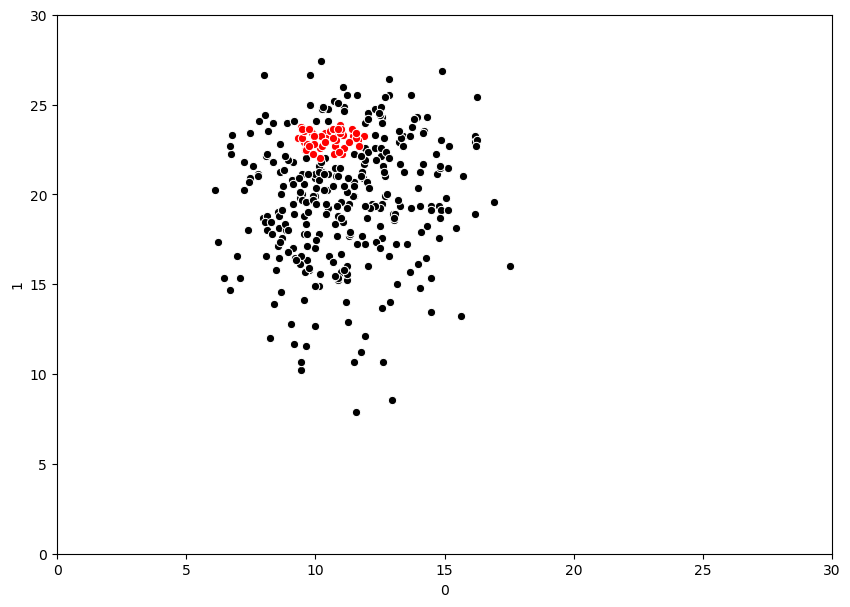

In [97]:
clusterPerf = []
indivPerf = []
clutWin = 0
clutLoss = 0
indiWin = 0
indiLoss = 0
for fomc in range(26, 34):
    new_cluster = DataCluster.cluster(fomc)
    clusterRet, win, loss = pipelineClusterFuture(new_cluster, fomc)
    clutWin += win
    clutLoss += loss
    indivRet, win, loss = pipelineIndividualFuture(new_cluster, fomc)
    indiWin += win
    indiLoss += loss
    clusterPerf.append(clusterRet)
    indivPerf.append(indivRet)
    print("Total return on Cluster-heavy strategy : {}".format(clusterRet))
    print("Total return on naive strategy : {}".format(indivRet))

In [98]:
print(np.mean(clusterPerf))
print(clusterPerf)
print(np.mean(indivPerf))
print(indivPerf)
score = 1
for i in clusterPerf:
    score *= i
print(score)
print(clutWin, clutLoss)
score = 1
for i in indivPerf:
    score *= i
print(score)
print(indiWin, indiLoss)

1.0127350331990206
[0.9967043912046661, 1.0214648612175807, 0.9567035415300364, 1.0840514164573611, 1.000322433162206, 1.0138082624317266, 1.0322151202654584, 0.99661023932313]
1.0132676226442854
[1.0039712977283315, 1.0169615351029935, 0.9694979343669525, 1.0530154091477872, 1.001593906727476, 1.0265197153780181, 1.0384844243082791, 0.9960967583944449]
1.1015607724923937
172 710
1.1085822507855718
221 661


In [96]:
print(np.mean(clusterPerf))
print(clusterPerf)
print(np.mean(indivPerf))
print(indivPerf)
score = 1
for i in clusterPerf:
    score *= i
print(score)

score = 1
for i in indivPerf:
    score *= i
print(score)

1.0085321147245028
[1.0174137571578803, 0.9760025512515453, 1.0070225984091263, 0.9909487669768199, 1.0139075391928294, 1.0122741275626694, 0.9967043912046661, 1.0214648612175807, 0.9567035415300364, 1.0840514164573611, 1.000322433162206, 1.0138082624317266, 1.0322151202654584, 0.99661023932313]
1.0084086049336969
[1.0213371124338708, 0.9657478643576536, 1.009296418345116, 0.9912678558980587, 1.010437973710359, 1.0134922631724157, 1.0039712977283315, 1.0169615351029935, 0.9694979343669525, 1.0530154091477872, 1.001593906727476, 1.0265197153780181, 1.0384844243082791, 0.9960967583944449]
1.1203247440732136
1.120316269779817


Wins = If we profit from the stock, we win. \
Loss = If we lose from the stock, we lose. \
Partial Win = If we profit from a specific FOMC period for a stock, we partial win. \
Partial Loss = If we lose from a specific FOMC period for a stock, we partial lose. \
Return = Amount of money at the end if we start with 1$.

전략:
어떤 주식에 대해 FOMC 이후 기대하는 최저점을 Expected Recovery Date(ERD), 그리고 해당 최저점이 정말 최저점일 경우 Recovery Term 의 조건부 기댓값을 Expected Term 이라 합니다.
ERD때의 주가가 FOMC 이전 주가보다 낮다면, 해당 지점에서 주식을 매수합니다.
그 후, ERD로부터 Expected Term 기간만큼 지났을 때 해당 주식을 매도합니다.
단, Expected Term 을 기다리는 기간 중 주식이 10% 이상 손해를 보았다면 ERD 가 틀렸다고 판단해 즉시 매도합니다.

In [100]:
def backtestNaive(df, fomc):
    init = 1
    win = 0
    lose = 0
    i = fomc
    if len(df) <= 34 - i:
        return init, win, lose
    vect = df.loc[34 - i - 1]
    vect = vect.drop('id')
    buyPrice = vect[0]
    sellPrice = vect[30]
    init = init * sellPrice / buyPrice
    if(sellPrice > buyPrice):
        win = win + 1
    else:
        lose += 1
    return init, win, lose

def pipelineNaive(cluster, fomc):
    score = 0
    win = 0
    loss = 0
    totWin = 0
    totLoss = 0
    for stock in cluster:
        df, termInfo = initTicker(stock)
        val, partWin, partLoss = backtestNaive(df, fomc)
        totWin += partWin
        totLoss += partLoss
        if(val > 1):
            win += 1
        else:
            loss += 1
        score = score + val
    print("Wins : {} Loss : {}".format(win, loss))
    return score / len(cluster), win, loss

[0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0]
              0          1
A      6.526316  20.285714
AAP   12.157895  21.857143
ABBV  12.394737  23.571429
ABC    9.789474  20.714286
ABT   11.894737  15.571429
...         ...        ...
XOM    9.842105  22.142857
XYL   10.236842  24.142857
YUM   11.684211  16.428571
ZBH   13.842105  23.285714
ZTS   12.710526  22.857143

[353 rows x 2 columns]


KeyboardInterrupt: 

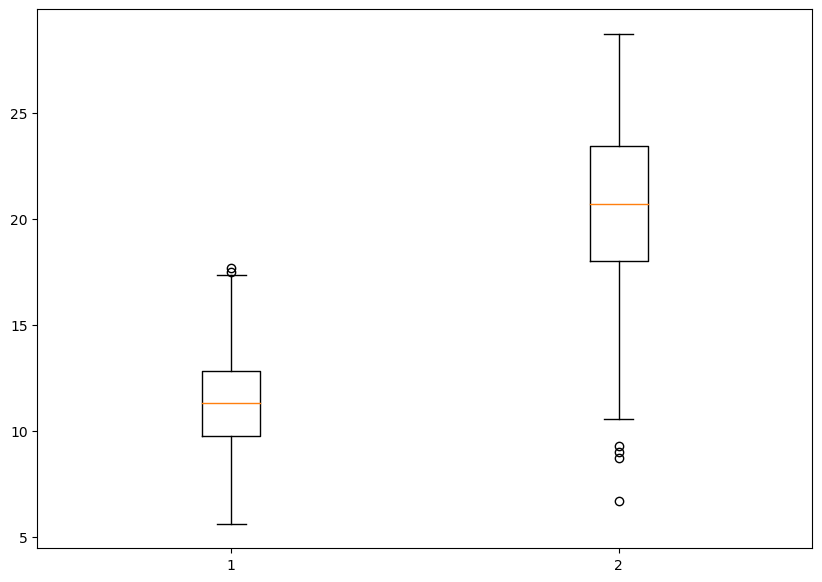

In [99]:
naivePef = []
naiveWin = 0
naiveLoss = 0
for fomc in range(26, 34):
    new_cluster = DataCluster.cluster(fomc)
    naiveRet, win, loss = pipelineNaive(new_cluster, fomc)
    naiveWin += win
    naiveLoss += loss
    clusterPerf.append(clusterRet)
    indivPerf.append(indivRet)
    print("Total return on Cluster-heavy strategy : {}".format(clusterRet))
    print("Total return on naive strategy : {}".format(indivRet))